<a href="https://colab.research.google.com/gist/pn11/6857f36160cda662b80bf0a7a4e01e25/untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [2]:
!pip install japanize-matplotlib
import japanize_matplotlib

In [3]:
res = requests.get('http://www.city.wako.lg.jp/home/fukushi/kenkozukuri/kansensho/coronavirus/_19310.html')

In [4]:
soup = BeautifulSoup(res.text, 'html.parser')

In [5]:
tables = soup.find_all('table')
# 2個目が COVID-19 の表という前提
table = tables[1]

rows = table.findAll('tr')
with open('data.csv', 'w') as csv:
    for row in rows:
        txts = [c.get_text().strip().replace('\n', '') for c in row.findAll(['td', 'th'])]
        if len(txts) != 7:
            print('Error: skip this data: ', txts)
            continue
        csv.write(','.join(txts) + '\n')

Error: skip this data:  ['発生届 取り下げ', '県の報道発表（7571例目）', '県の7431例目と重複していたため']


In [6]:
df = pd.read_csv('data.csv', index_col='番号')
#df

In [7]:
# 年の追加
# case #1-269,271,274-275,305-306  -> 2020
# case # 270,272,273,276-304,307-  -> 2021
def add_year(df, low=1, high=99999, year=2020):
    cond = (df.index>=low) & (df.index<=high)
    df.loc[cond,'陽性判明日'] = df.loc[cond, '陽性判明日'].apply(lambda x: f"{year}年"+x)
    return df

df = add_year(df, high=269, year=2020)
df = add_year(df, low=271, high=271, year=2020)
df = add_year(df, low=274, high=275, year=2020)
df = add_year(df, low=305, high=306, year=2020)

df = add_year(df, low=270, high=270, year=2021)
df = add_year(df, low=272, high=273, year=2021)
df = add_year(df, low=276, high=304, year=2021)
df = add_year(df, low=307, year=2021)
#df

In [8]:
df['陽性判明日'] = pd.to_datetime(df['陽性判明日'], format='%Y年%m月%d日')
df

,年代,性別,職業,陽性判明日,リンク先,その他
番号,,,,,,
723,未就学児,男,無職,2021-07-02,県の報道発表（46893例目）,同居家族に陽性者あり（718～722例目）
722,10歳未満,男,学生,2021-07-02,県の報道発表（46892例目）,同居家族に陽性者あり（718～721例目、723例目）
721,10代,女,学生,2021-07-02,県の報道発表（46891例目）,同居家族に陽性者あり（718～720例目、722例目、723例目）
720,10代,女,学生,2021-07-02,県の報道発表（46890例目）,同居家族に陽性者あり（718例目、719例目、721～723例目）
719,30代,女,無職,2021-07-02,県の報道発表（46889例目）,同居家族に陽性者あり（718例目、720～723例目）
...,...,...,...,...,...,...
5,40代,男,会社員,2020-04-06,県の発表資料（ 191例目）,同居家族に陽性者あり（4例目）
4,50代,女,医療事務,2020-04-04,県の発表資料（ 169例目）,NaN
3,50代,男,自営業,2020-03-31,県の発表資料（ 106例目）,令和2年3月12日～16日に海外渡航歴あり


<AxesSubplot:xlabel='陽性判明日'>

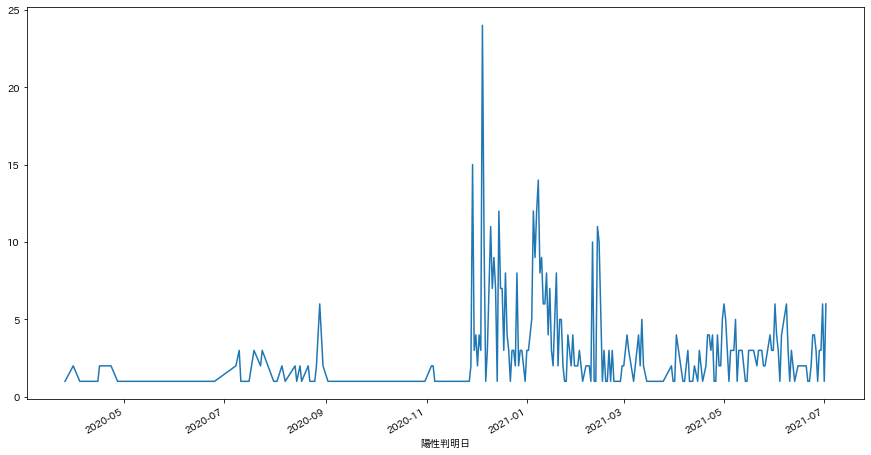

In [9]:
daily_cases = df.groupby('陽性判明日').size()
plt.figure(figsize=(15, 8))
#daily_cases.plot.bar()
daily_cases.plot()


累積


<AxesSubplot:xlabel='陽性判明日'>

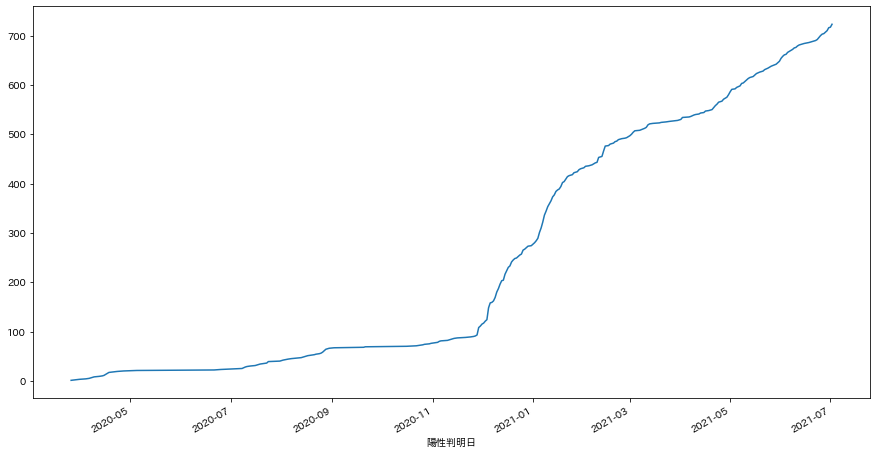

In [10]:
print('累積')
plt.figure(figsize=(15, 8))
daily_cases.cumsum().plot()

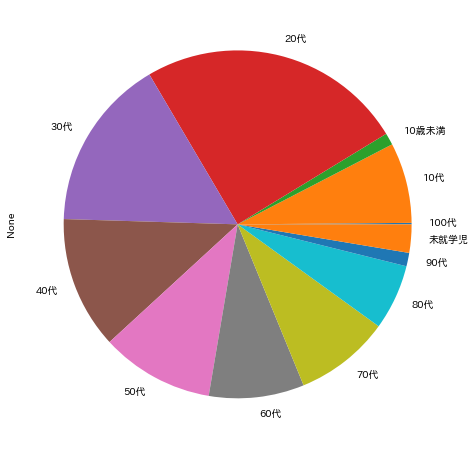

In [11]:
plt.figure(figsize=(15, 8))
daily_cases = df.groupby('年代').size().plot.pie()

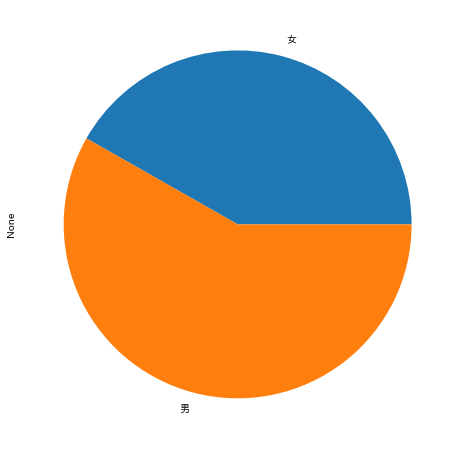

In [12]:
plt.figure(figsize=(15, 8))
daily_cases = df.groupby('性別').size().plot.pie()

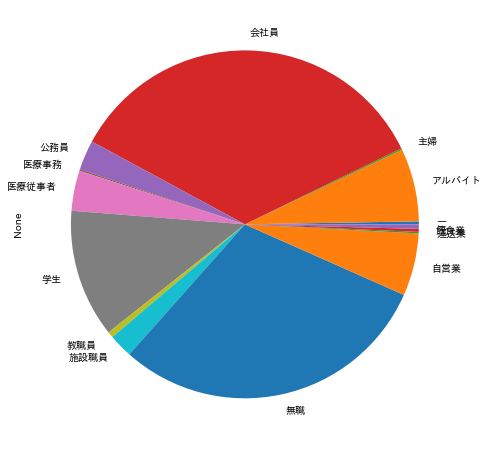

In [13]:
plt.figure(figsize=(15, 8))
daily_cases = df.groupby('職業').size().plot.pie()

<AxesSubplot:ylabel='None'>

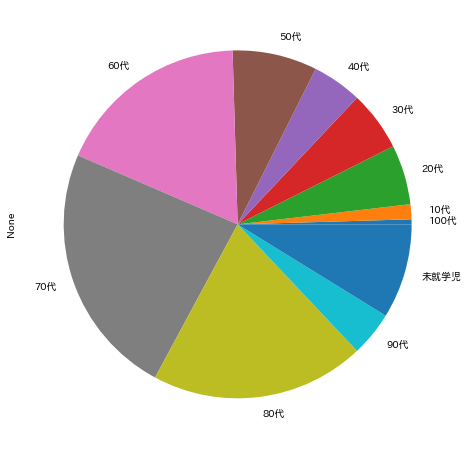

In [14]:
# 無職の人の年代
plt.figure(figsize=(15, 8))
df[df['職業']=='無職'].groupby('年代').size().plot.pie()